In [25]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 


## Part 1: Wrangling
## Problem 1

In [26]:
conn = sqlite3.connect("lahman2014.sqlite")

query = """
SELECT
    t.teamID,
    t.yearID,
    t.franchID,
    t.W AS wins,
    t.G AS games_played,
    COALESCE(s.total_payroll, 0) AS total_payroll,
    CASE
        WHEN t.G = 0 THEN NULL
        ELSE (t.W * 1.0 / t.G) * 100.0  -- Avoid integer division
    END AS winning_percentage
FROM
    Teams t
LEFT JOIN (
    SELECT
        teamID,
        yearID,
        SUM(salary) AS total_payroll
    FROM
        Salaries
    GROUP BY
        teamID,
        yearID
) s ON t.teamID = s.teamID AND t.yearID = s.yearID
"""

# Execute the query
results = conn.execute(query).fetchall()

# Print the first few rows of the results
for row in results:
    print(row)


print()
print()


query_2014 = """SELECT
    t.teamID,
    t.yearID,
    t.franchID,
    t.W AS wins,
    t.G AS games_played,
    COALESCE(s.total_payroll, 0) AS total_payroll,
    CASE
        WHEN t.G = 0 THEN NULL
        ELSE (t.W * 1.0 / t.G) * 100.0  -- Avoid integer division
    END AS winning_percentage
FROM
    Teams t
LEFT JOIN (
    SELECT
        teamID,
        yearID,
        SUM(salary) AS total_payroll
    FROM
        Salaries
    GROUP BY
        teamID,
        yearID
) s ON t.teamID = s.teamID AND t.yearID = s.yearID WHERE t.yearID == 2014 """

# only has the data form the 2014 season 
results = conn.execute(query_2014).fetchall()

for rows in results:
    print(rows)

years = pd.read_sql(query, conn)
data_2014 = years[years['yearID'] == 2014]
print(years)

conn.close()

('BS1', 1871, 'BNA', 20, 31, 0, 64.51612903225806)
('CH1', 1871, 'CNA', 19, 28, 0, 67.85714285714286)
('CL1', 1871, 'CFC', 10, 29, 0, 34.48275862068966)
('FW1', 1871, 'KEK', 7, 19, 0, 36.84210526315789)
('NY2', 1871, 'NNA', 16, 33, 0, 48.484848484848484)
('PH1', 1871, 'PNA', 21, 28, 0, 75.0)
('RC1', 1871, 'ROK', 4, 25, 0, 16.0)
('TRO', 1871, 'TRO', 13, 29, 0, 44.827586206896555)
('WS3', 1871, 'OLY', 15, 32, 0, 46.875)
('BL1', 1872, 'BLC', 35, 58, 0, 60.3448275862069)
('BR1', 1872, 'ECK', 3, 29, 0, 10.344827586206897)
('BR2', 1872, 'BRA', 9, 37, 0, 24.324324324324326)
('BS1', 1872, 'BNA', 39, 48, 0, 81.25)
('CL1', 1872, 'CFC', 6, 22, 0, 27.27272727272727)
('MID', 1872, 'MAN', 5, 24, 0, 20.833333333333336)
('NY2', 1872, 'NNA', 34, 56, 0, 60.71428571428571)
('PH1', 1872, 'PNA', 30, 47, 0, 63.829787234042556)
('TRO', 1872, 'TRO', 15, 25, 0, 60.0)
('WS3', 1872, 'OLY', 2, 9, 0, 22.22222222222222)
('WS4', 1872, 'NAT', 0, 11, 0, 0.0)
('BL1', 1873, 'BLC', 34, 57, 0, 59.64912280701754)
('BL4', 1

## Part 2: Exploratory Data Analysis 

# Problem 2

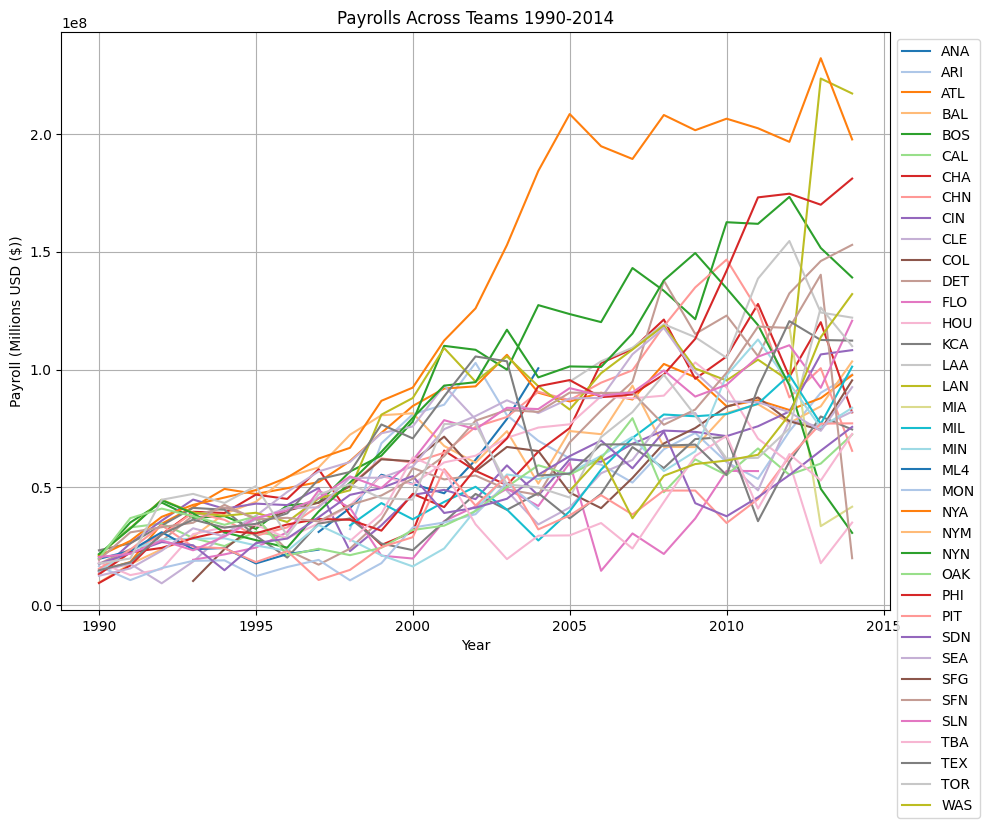

In [27]:
conn = sqlite3.connect("lahman2014.sqlite")

query_payrolls = """
SELECT
    teamID,
    yearID,
    sum(salary) as total_payroll
FROM
    Salaries
WHERE
    yearID BETWEEN 1990 AND 2014
GROUP BY
    teamID,
    yearID
"""

payrolls_data = pd.read_sql(query_payrolls, conn)

conn.close()

payrolls_pivot = payrolls_data.pivot(index='yearID', columns='teamID', values='total_payroll')



plt.figure(figsize=(10, 8))

colors = plt.cm.tab20.colors

for i, team in enumerate(payrolls_pivot.columns):
    plt.plot(payrolls_pivot.index, payrolls_pivot[team], label=team, color=colors[i % len(colors)])

plt.xlabel('Year')
plt.ylabel('Payroll (Millions USD ($))')
plt.title('Payrolls Across Teams 1990-2014')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('payrolls_across_teams.png')
plt.show()


#### Question 1

What statements can you make about the distribution of payrolls conditioned on time based on these plots? 
Remember you can make statements in terms of central tendency, spread, etc.



After pliotting the payrol over all the teams between 1990 and 2014, You can make the statements that the payroll has been on an upward trend, but has taken a more drastic increase in the more redcent years. Or that there is only one outlier in the data set which is the ATL Braves

#### Problem 3
Write code to produce plots that specifically show at least one of the statements you made in Question 1. For example, if you make a statement that there is a trend for payrolls to decrease over time, make a plot of a statistic for central tendency (e.g., mean payroll) vs. time to show that specifically.

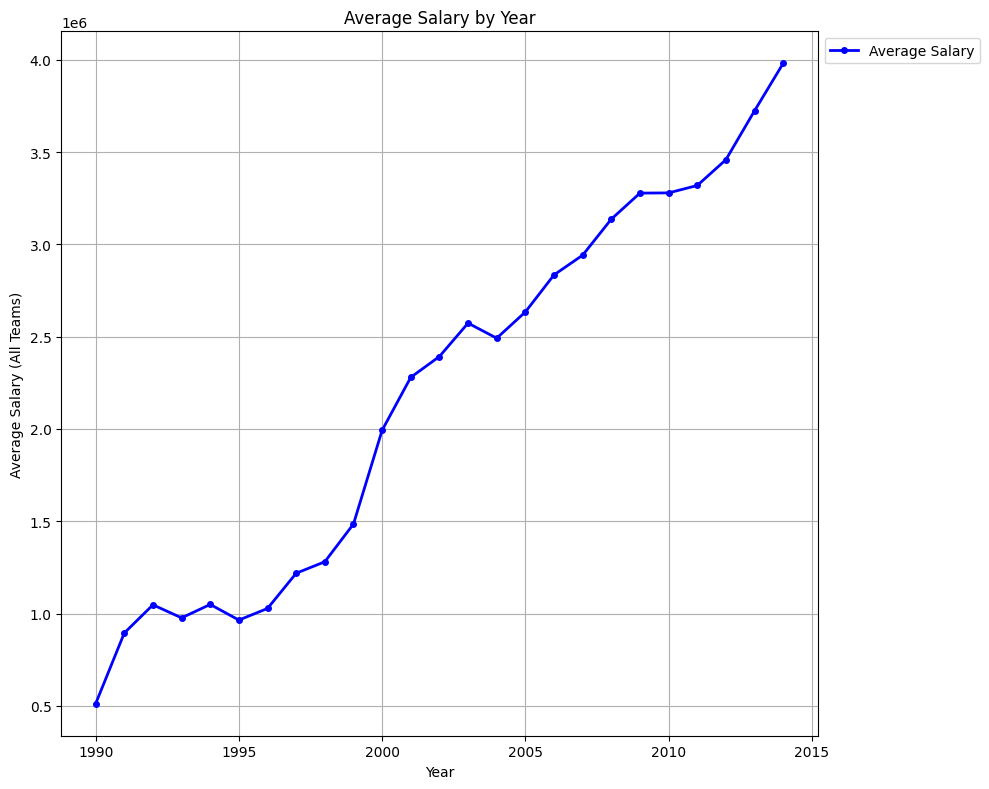

In [28]:
conn = sqlite3.connect("lahman2014.sqlite")

query_salaryAVG = """
SELECT 
    yearID,
    AVG(salary) AS avg_salary
    FROM
        Salaries
    WHERE
        yearID BETWEEN 1990 AND 2014
    GROUP BY
        yearID
     """

payrolls_data = pd.read_sql(query_salaryAVG, conn)

conn.close()

plt.figure(figsize=(10, 8))

avg_salary = []
for i in range(len(payrolls_data)):
    avg_salary.append(payrolls_data["avg_salary"][i])

plt.plot(payrolls_data["yearID"], avg_salary, linestyle='-', marker='o', markersize=4, linewidth=2, color='blue')

plt.xlabel('Year')
plt.ylabel('Average Salary (All Teams)')
plt.title('Average Salary by Year')
plt.grid(True)
plt.legend(['Average Salary'], loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend
plt.tight_layout()
plt.savefig('salary_by_year.png')



plt.tight_layout()

plt.show()
plt.close()





### Correlation between payroll and winning percentage
#### Problem 4


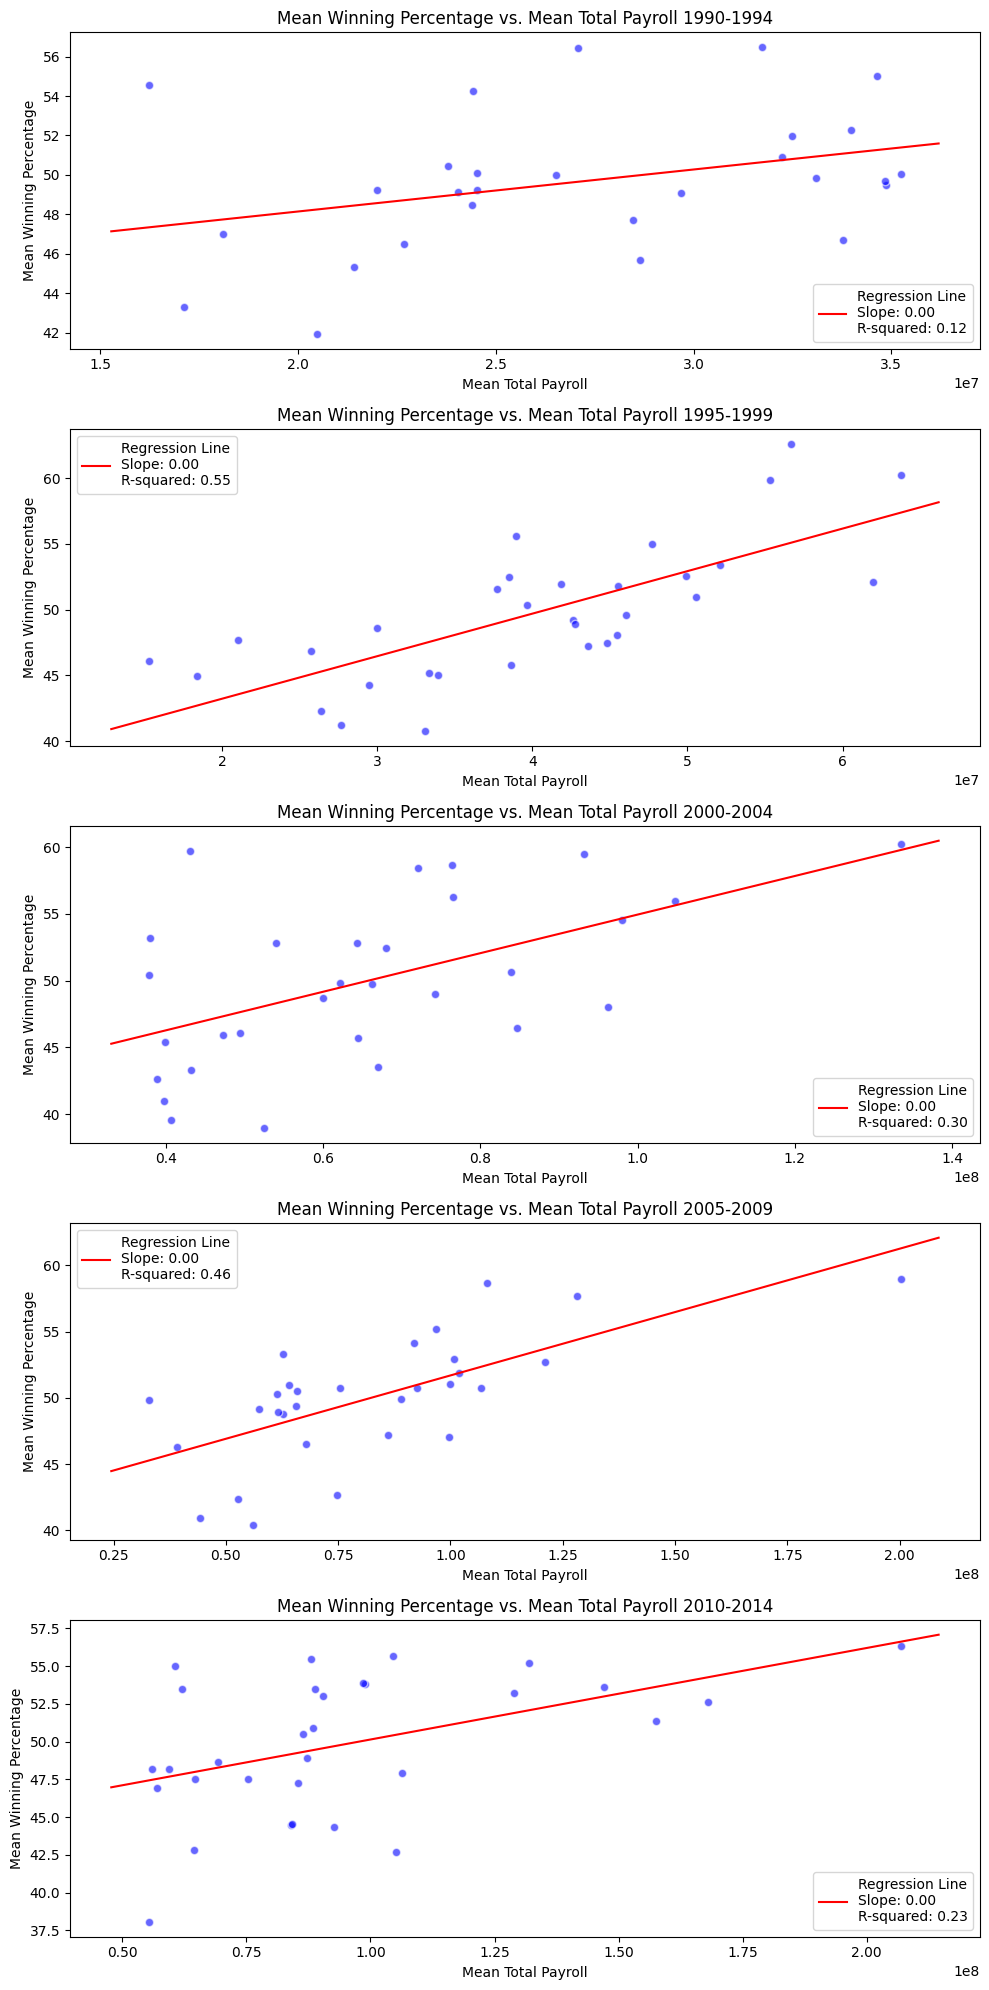

In [29]:
conn = sqlite3.connect("lahman2014.sqlite")

# Create an empty list to store the plots
fig, axs = plt.subplots(5, 1, figsize=(10, 20))  # 5 subplots arranged vertically

# Loop through each 5-year interval
for i in range(5):
    # Define the start and end years for the interval
    start_year = 1990 + i * 5
    end_year = start_year + 4
    
    # SQL query to get the winning percentage and total payroll for the current 5-year interval
    query_winning = f"""
    SELECT
        t.teamID,
        t.yearID,
        CASE
            WHEN t.G = 0 THEN NULL
            ELSE (t.W * 1.0 / t.G) * 100.0  
        END AS winning_percentage,
        COALESCE(s.total_payroll, 0) AS total_payroll
    FROM
        Teams t
    LEFT JOIN (
        SELECT
            teamID,
            yearID,
            SUM(salary) AS total_payroll
        FROM
            Salaries
        WHERE
            yearID BETWEEN {start_year} AND {end_year}
        GROUP BY
            teamID,
            yearID
    ) s ON t.teamID = s.teamID AND t.yearID = s.yearID
    WHERE
        t.yearID BETWEEN {start_year} AND {end_year};
    """
    
    # Read data for the current 5-year interval from the database
    interval_data = pd.read_sql(query_winning, conn)
    
    # Calculate mean winning percentage and mean payroll for this interval
    mean_winning = interval_data.groupby('teamID')['winning_percentage'].mean()
    mean_payroll = interval_data.groupby('teamID')['total_payroll'].mean()
    
    # Create scatter plot
    scatter = axs[i].scatter(mean_payroll, mean_winning, c='blue', alpha=0.6, edgecolors='w')
    
    # Add regression line
    slope, intercept, r_value, p_value, std_err = linregress(mean_payroll, mean_winning)
    line_x = np.array(axs[i].get_xlim())
    line_y = intercept + slope * line_x
    axs[i].plot(line_x, line_y, color='red', label=f'Regression Line\nSlope: {slope:.2f}\nR-squared: {r_value**2:.2f}')
    
    axs[i].set_xlabel('Mean Total Payroll')
    axs[i].set_ylabel('Mean Winning Percentage')
    axs[i].set_title(f'Mean Winning Percentage vs. Mean Total Payroll {start_year}-{end_year}')
    axs[i].legend()


plt.tight_layout()
plt.show()

conn.close()


# I have to fix the colors to make unique color per team and change it to the "mean" and add regression line

#### Question 2

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

## Part 3: Data transformations
### Standardizing across years
It looks like comparing payrolls across years is problematic so let's do a transformation that will help with these comparisons.

#### Problem 5